In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 df = pd.read_csv("/content/drive/MyDrive/DataSet/Amazon Sales data.csv")
 df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.shape

(100, 14)

In [5]:
df.columns.to_list()

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [11]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract month and year from date columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [12]:
total_revenue = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
units_sold = df['Units Sold'].sum()
average_unit_price = df['Unit Price'].mean()
average_unit_cost = df['Unit Cost'].mean()

print(f"Total Revenue: {total_revenue}")
print(f"Total Profit: {total_profit}")
print(f"Units Sold: {units_sold}")
print(f"Average Unit Price: {average_unit_price}")
print(f"Average Unit Cost: {average_unit_cost}")

Total Revenue: 137348768.31
Total Profit: 44168198.39999999
Units Sold: 512871
Average Unit Price: 276.7613
Average Unit Cost: 191.048


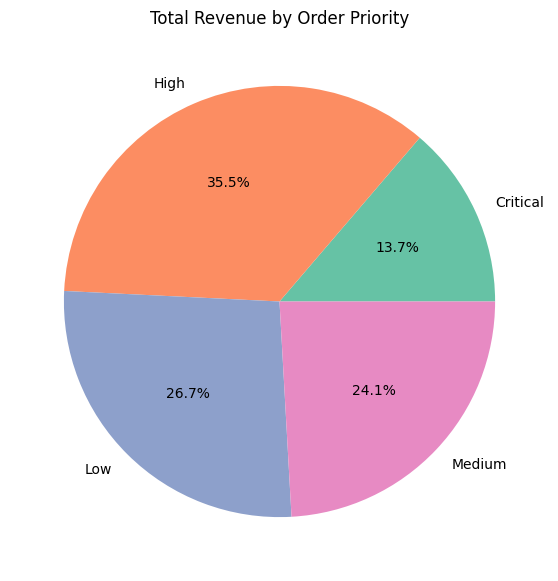

In [13]:
# Ensure 'Order Priority' column exists in the dataframe
if 'Order Priority' in df.columns:
    # Mapping the abbreviations to full names
    priority_map = {'H': 'High', 'C': 'Critical', 'M': 'Medium', 'L': 'Low'}
    df['Order Priority Full'] = df['Order Priority'].map(priority_map)

    # Group by 'Order Priority Full' and sum of total revenue
    order_priority_sales = df.groupby('Order Priority Full')['Total Revenue'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(7, 7))
    plt.pie(order_priority_sales['Total Revenue'], labels=order_priority_sales['Order Priority Full'], autopct='%1.1f%%', colors=sns.color_palette('Set2', len(order_priority_sales)))
    plt.title('Total Revenue by Order Priority')
    plt.show()


In [14]:
# Summary statistics
print(df.describe())

# Sales trends analysis
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum()

# Profit analysis
profit_by_region = df.groupby('Region')['Total Profit'].sum()
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum()

most_profitable_item = profit_by_item_type.idxmax()
least_profitable_item = profit_by_item_type.idxmin()

print(f"Most profitable item type: {most_profitable_item}")
print(f"Least profitable item type: {least_profitable_item}")


                Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017-05-22 00:00:00  9.940222e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.606153e+08                  NaN  2794.484562   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  \
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02   
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05   
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e

In [15]:
df.info

<bound method DataFrame.info of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0        Offline              H 2010-05-28  669165933 2010-06-27        9925   
1         Online              C 2012-08-22  963881480 2012-09-15        2804   
2        Offline              L 2014-05-02  341417157 2014-05-08        1779   
3         Online              C 2014-06-20  514321792 2014-07-05        8102   
4        Offline              L 2013-02-01  115456712 2013-02-06        5062   
..           ...            ...        ...        ...        ...         ...   
95        Online              M 2011-07-26  512878119 2011-09-03         888   
96       Offline              L 2011-11-11  810711038 2011-12-28        6267   
97       Offline              C 2016-06-01  728815257 2016-06-29        1485   
98       Offline              M 2015-07-30  559427106 2015-08-08        5767   
99       Offline              L 2012-02-10  665095412 2012-02-15        5367   

    Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  \
0       255.28     159.42     2533654.00  1582243.50     951410.50   
1       205.70     117.11      576782.80   328376.44     248406.36   
2       651.21     524.96     1158502.59   933903.84     224598.75   
3         9.33       6.92       75591.66    56065.84      19525.82   
4       651.21     524.96     3296425.02  2657347.52     639077.50   
..         ...        ...            ...         ...           ...   
95      109.28      35.84       97040.64    31825.92      65214.72   
96        9.33       6.92       58471.11    43367.64      15103.47   
97      154.06      90.93      228779.10   135031.05      93748.05   
98       81.73      56.67      471336.91   326815.89     144521.02   
99      668.27     502.54     3586605.09  2697132.18     889472.91   

    Order Month  Order Year Order Priority Full  
0             5        2010                High  
1             8        2012            Critical  
2             5        2014                 Low  
3             6        2014            Critical  
4             2        2013                 Low  
..          ...         ...                 ...  
95            7        2011              Medium  
96           11        2011                 Low  
97            6        2016            Critical  
98            7        2015              Medium  
99            2        2012                 Low  

[100 rows x 17 columns]>

In [16]:
df['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

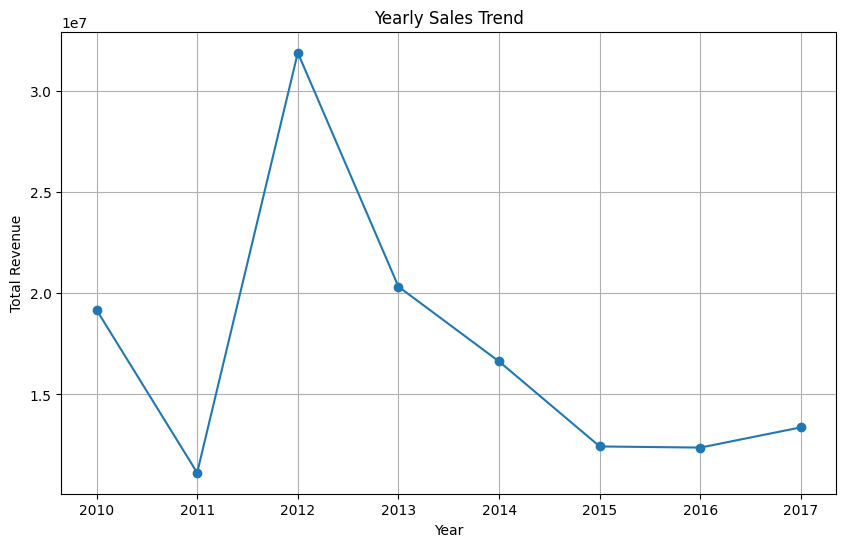

In [17]:
# Plot yearly sales trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region               100 non-null    object        
 1   Country              100 non-null    object        
 2   Item Type            100 non-null    object        
 3   Sales Channel        100 non-null    object        
 4   Order Priority       100 non-null    object        
 5   Order Date           100 non-null    datetime64[ns]
 6   Order ID             100 non-null    int64         
 7   Ship Date            100 non-null    datetime64[ns]
 8   Units Sold           100 non-null    int64         
 9   Unit Price           100 non-null    float64       
 10  Unit Cost            100 non-null    float64       
 11  Total Revenue        100 non-null    float64       
 12  Total Cost           100 non-null    float64       
 13  Total Profit         100 non-null   

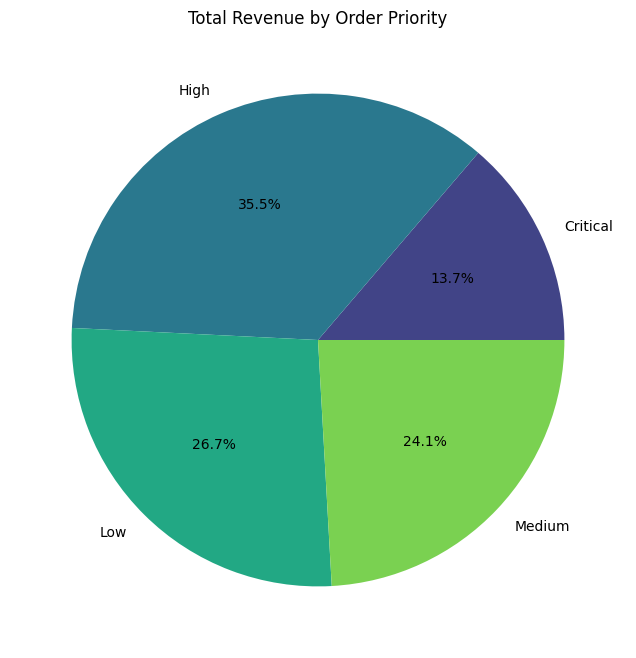

In [19]:

# Ensure 'Order Priority' column exists in the dataframe
if 'Order Priority' in df.columns:
    # Mapping the abbreviations to full names
    priority_map = {'H': 'High', 'C': 'Critical', 'M': 'Medium', 'L': 'Low'}
    df['Order Priority Full'] = df['Order Priority'].map(priority_map)

    # Group by 'Order Priority Full' and sum of total revenue
    order_priority_sales = df.groupby('Order Priority Full')['Total Revenue'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(order_priority_sales['Total Revenue'], labels=order_priority_sales['Order Priority Full'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(order_priority_sales)))
    plt.title('Total Revenue by Order Priority')
    plt.show()

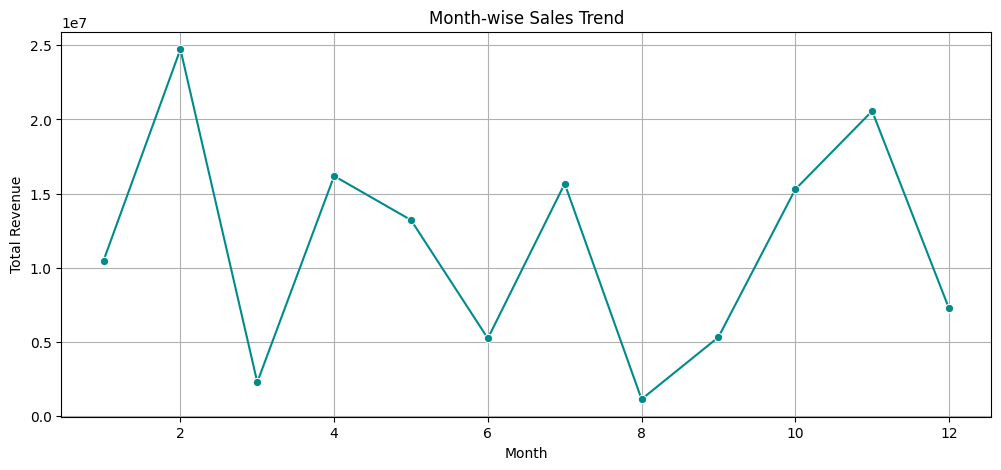

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
month_wise_sales_trend = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum()
plt.figure(figsize=(12, 5))
sns.lineplot(x=month_wise_sales_trend.index, y=month_wise_sales_trend.values,marker='o', color='darkcyan')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

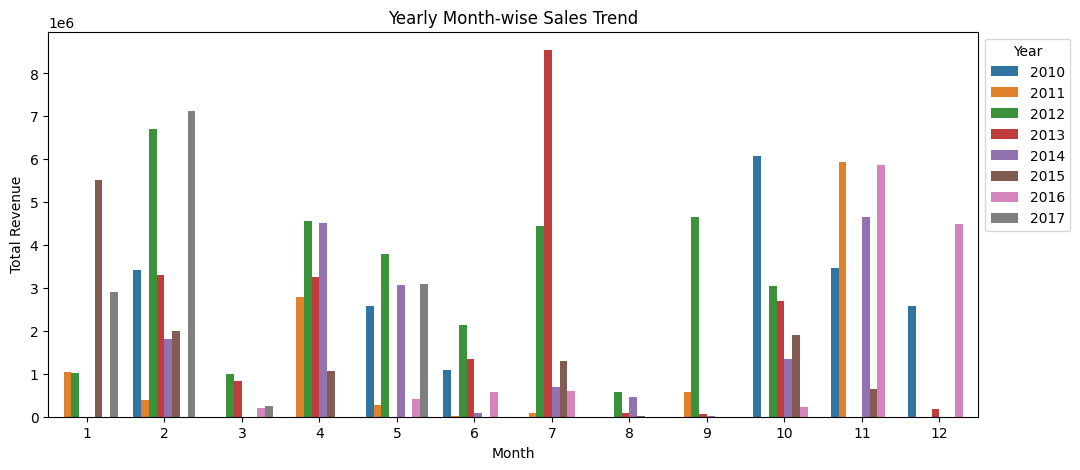

In [21]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
# group by year, month, and sum of total revenue
yearly_month_sales_trend = df.groupby(['Year','Month'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data = yearly_month_sales_trend, x = 'Month', y = 'Total Revenue', hue = 'Year', palette = 'tab10')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
# plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

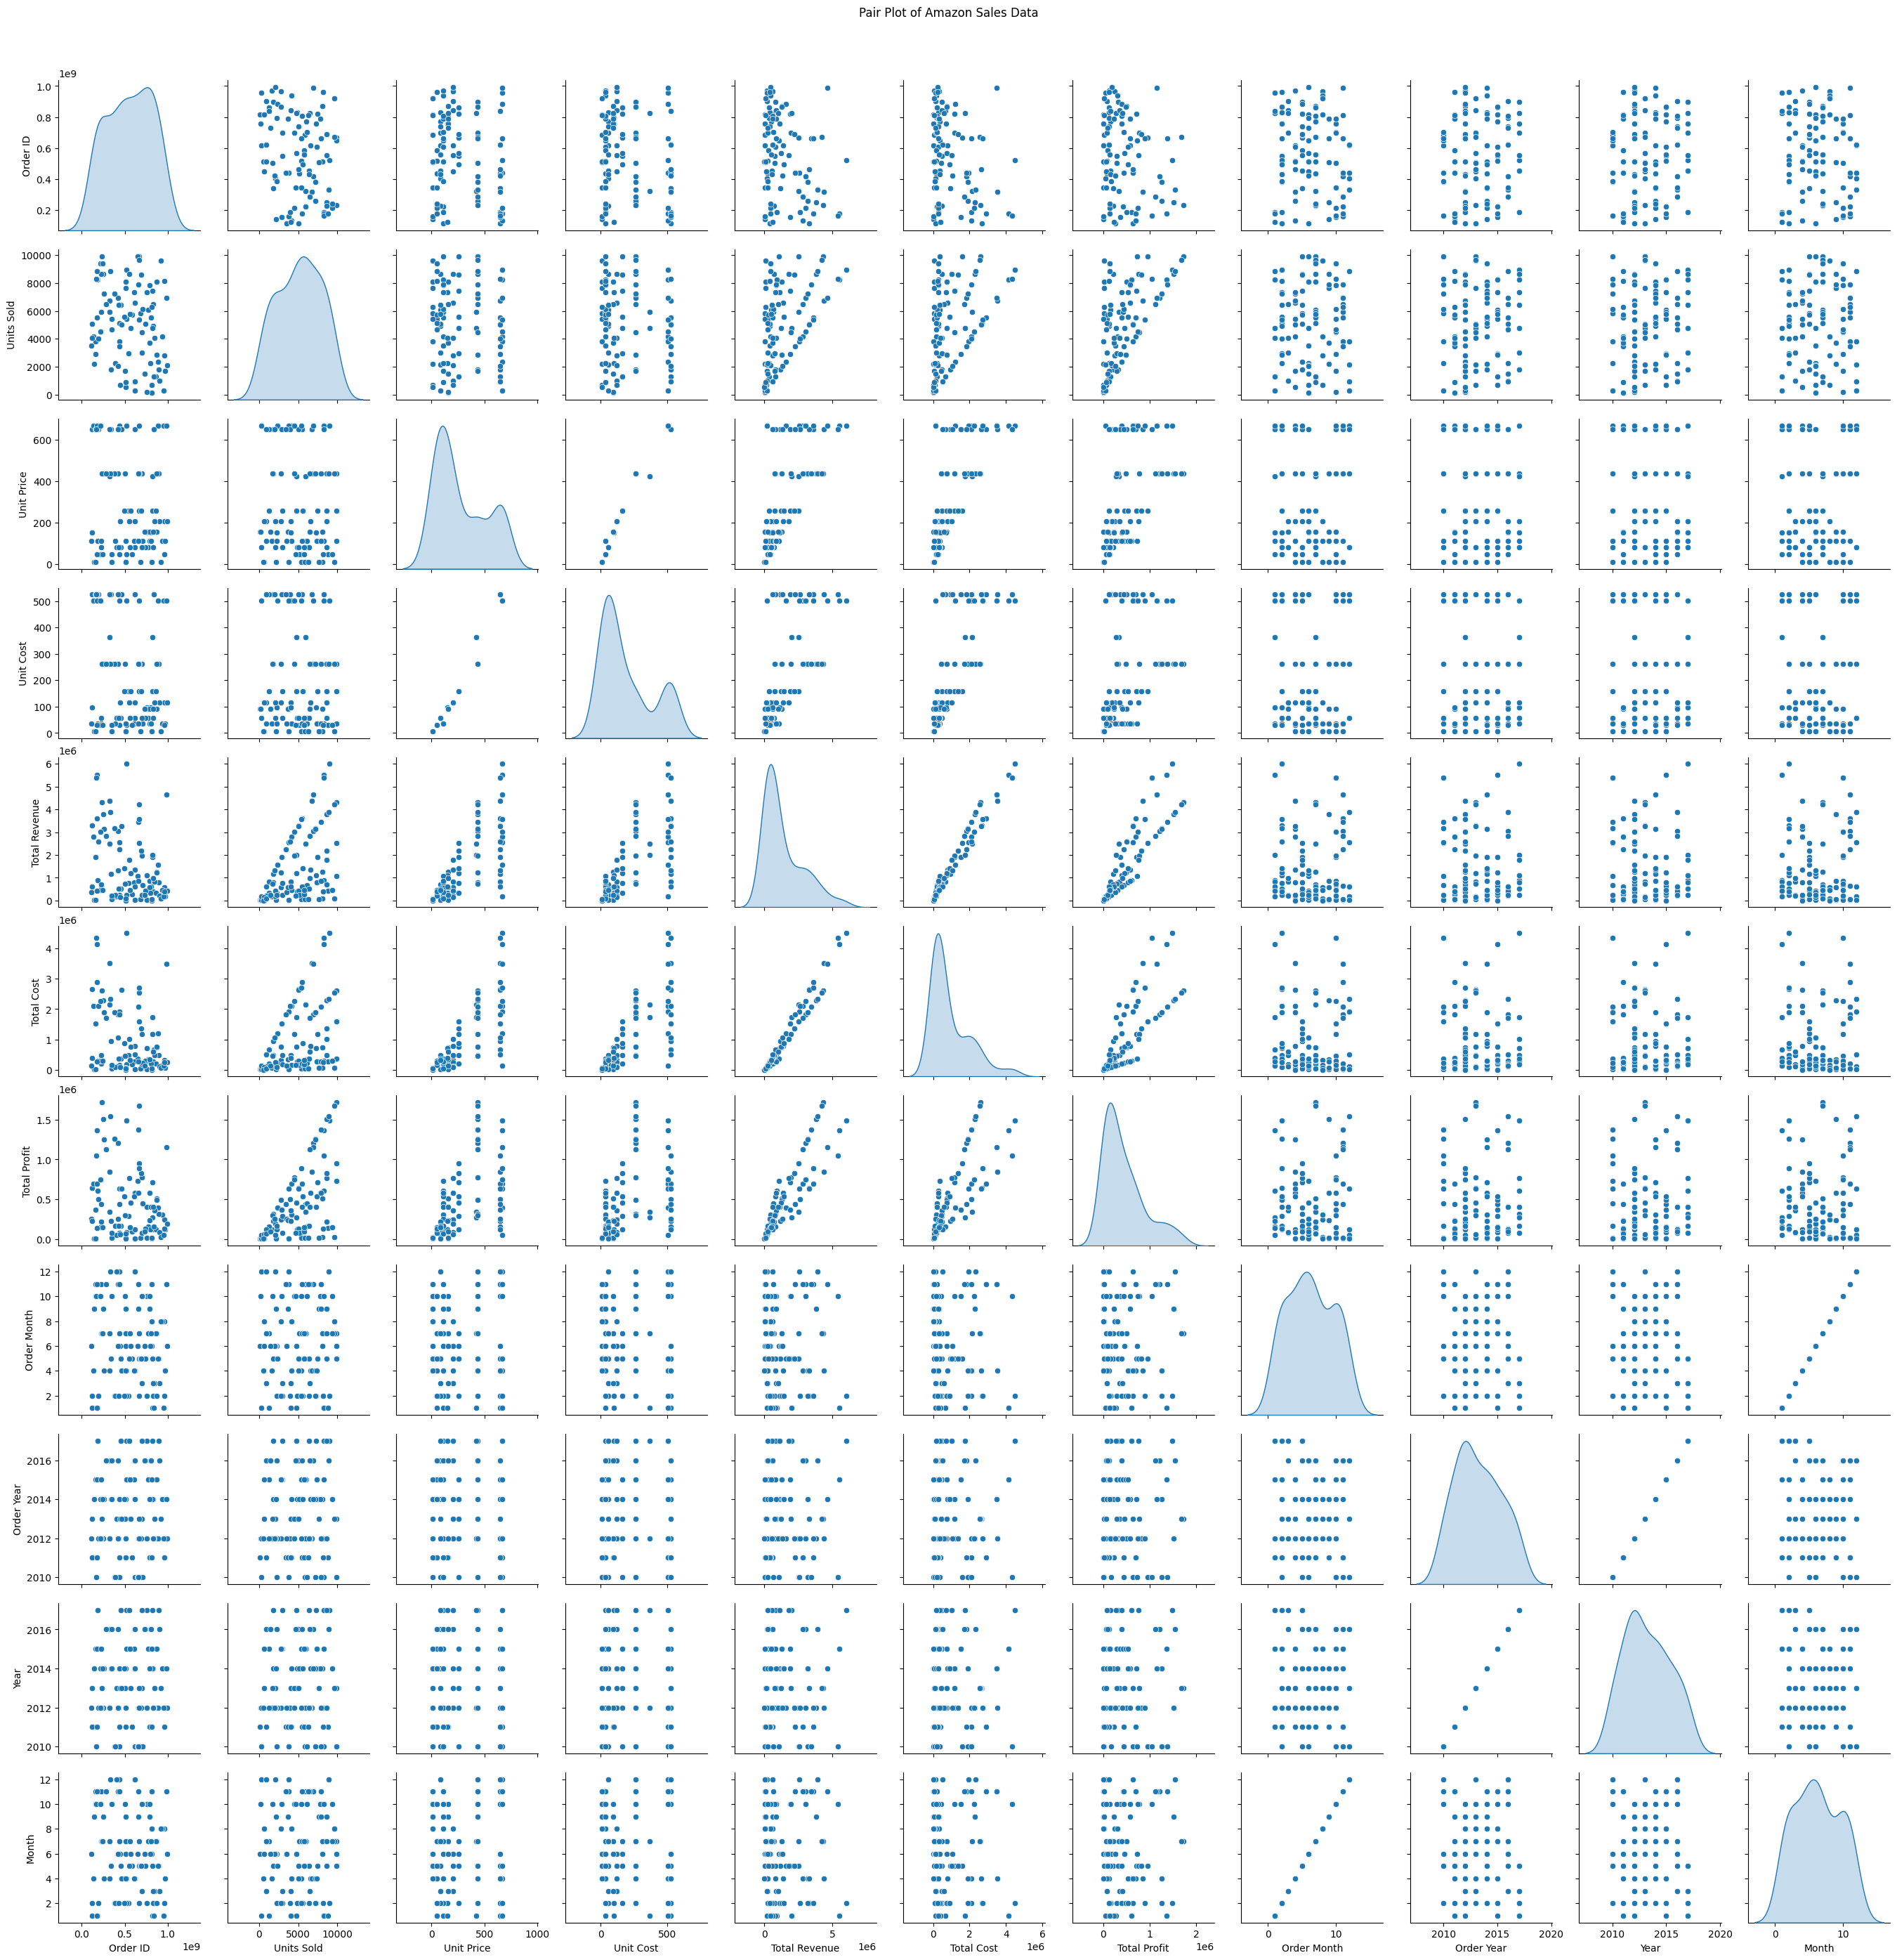

In [22]:
sns.pairplot(df, diag_kind='kde', hue=None, palette='viridis')
plt.suptitle('Pair Plot of Amazon Sales Data', y=1.02)  # Title with padding
plt.show()

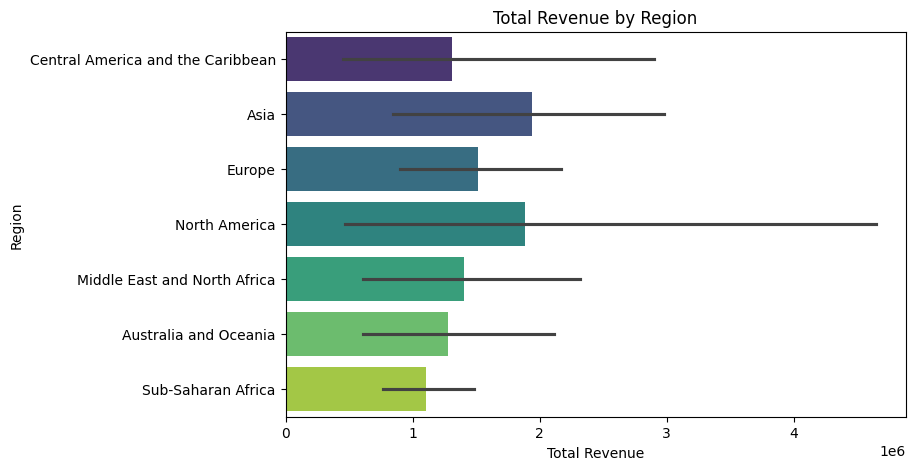

In [23]:
# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Sort the data by 'Total Revenue' in descending order
df_sorted = df.sort_values(by='Total Revenue', ascending=False)

# Plot total revenue by region using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sorted, x='Total Revenue', y='Region', palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

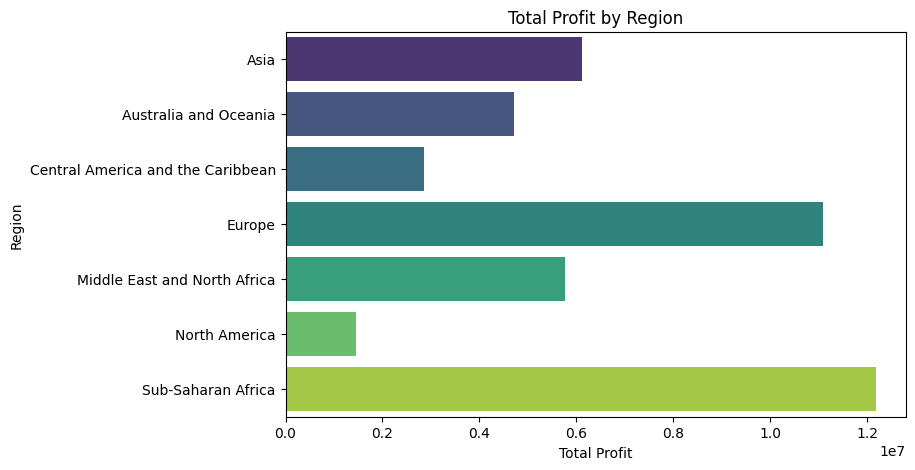

In [24]:
# Plot total profit by region
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by='Total Profit', ascending=False)

sns.barplot(data=profit_by_region.reset_index(), x='Total Profit', y='Region', palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.show()

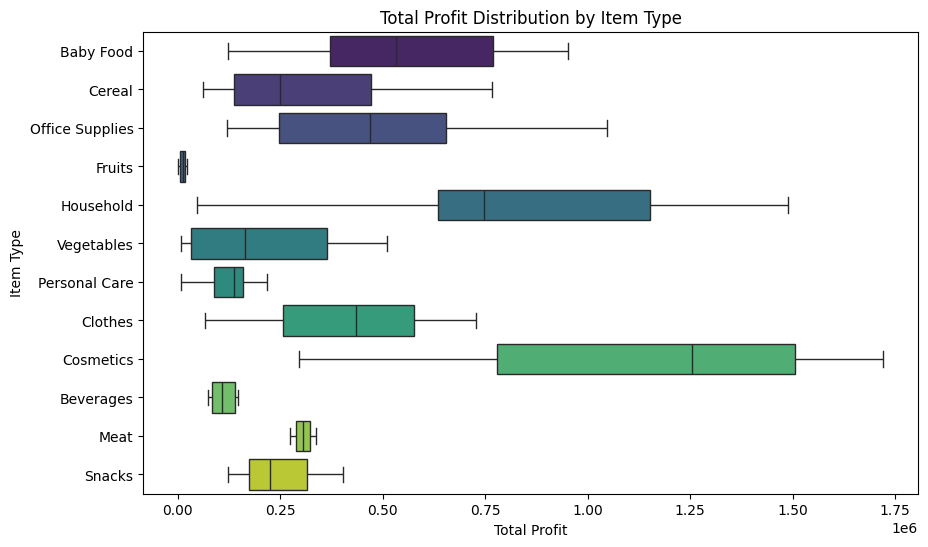

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total Profit', y='Item Type', palette='viridis')
plt.title('Total Profit Distribution by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

**1.........Top selling products**


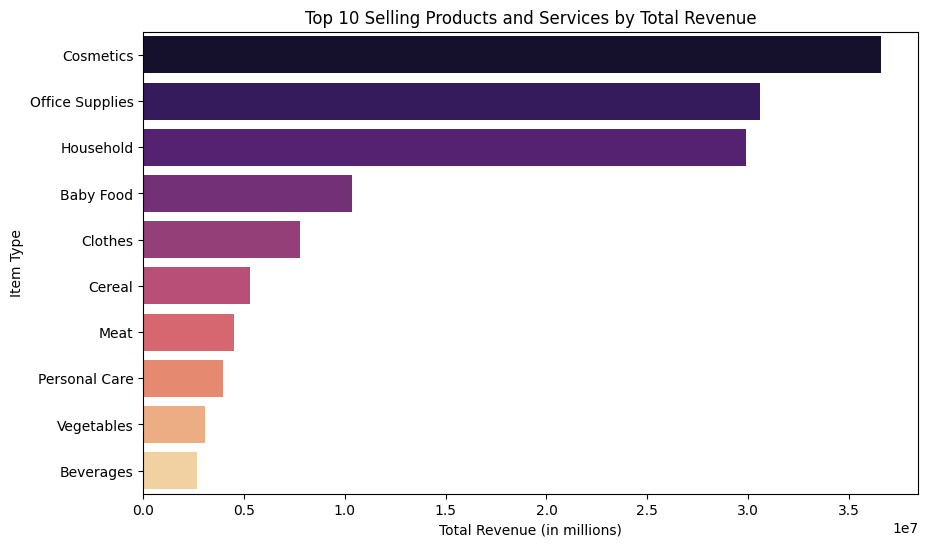

In [26]:
# Convert 'Total Revenue' to numeric, if necessary
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Calculate total revenue by item type
total_revenue_by_item = df.groupby('Item Type').sum(numeric_only=True)['Total Revenue'].reset_index()

# Sort by total revenue and select the top 10 item types
top_selling_items = total_revenue_by_item.sort_values(by='Total Revenue', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_items, x='Total Revenue', y='Item Type', palette='magma')
plt.title('Top 10 Selling Products and Services by Total Revenue')
plt.xlabel('Total Revenue (in millions)')
plt.ylabel('Item Type')

# Add value labels

plt.show()

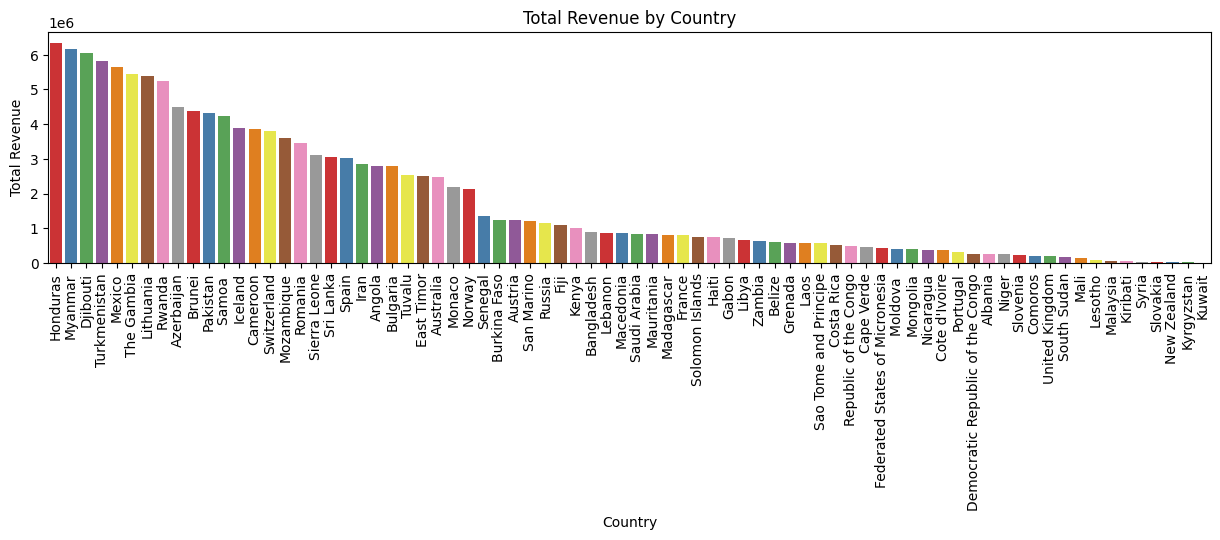

In [27]:
# Calculate country-wise total profit and revenue
country_sales = df.groupby('Country').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}).reset_index()

## Plot total revenue by country in ascending order
plt.figure(figsize=(15, 3))
country_sales_sorted_revenue = country_sales.sort_values(by='Total Revenue', ascending=False)


sns.barplot(x='Country', y='Total Revenue', data=country_sales_sorted_revenue, palette='Set1')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)

plt.show()

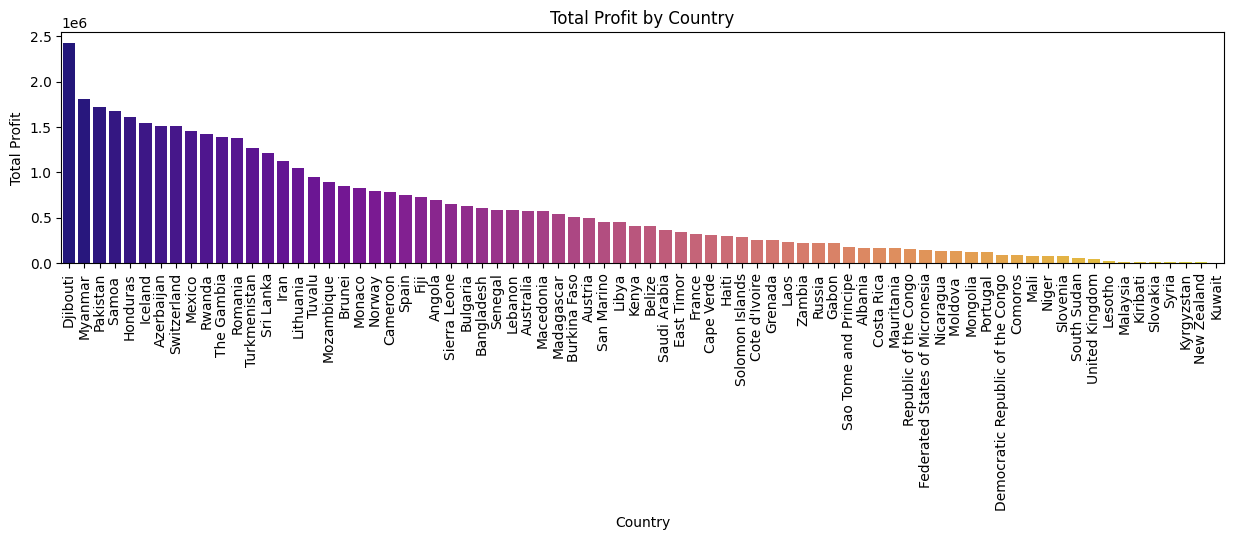

In [28]:
country_sales_sorted_profit = country_sales.sort_values(by='Total Profit', ascending=False)

# Plot total profit by country in ascending order
plt.figure(figsize=(15, 3))
sns.barplot(x='Country', y='Total Profit', data=country_sales_sorted_profit, palette='plasma')
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

plt.show()

**2...... How does sales performance vary by region or location**

In [29]:

import pandas as pd
import plotly.express as px

# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Aggregate total revenue by region
total_revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

fig = px.line(
    total_revenue_by_region,
    x='Region',
    y='Total Revenue',
    markers=True,  # Add markers to the line plot
    labels={'Total Revenue': 'Total Revenue'},
    title='Sales Performance by Region'

)

# Add text to the markers
fig.update_traces(text=total_revenue_by_region['Total Revenue'], textposition='top center')

# Customize the layout
fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Total Revenue',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)


fig.show()


**4.........Which marketing channels drive the most**

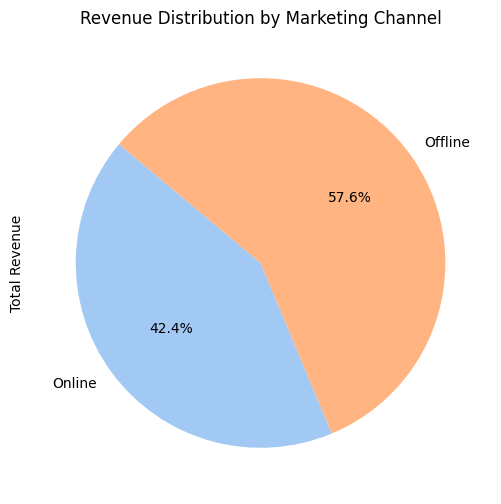

In [30]:
# Plot pie chart
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()

plt.figure(figsize=(6, 6))
sales_by_channel.sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Marketing Channel')

plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region               100 non-null    object        
 1   Country              100 non-null    object        
 2   Item Type            100 non-null    object        
 3   Sales Channel        100 non-null    object        
 4   Order Priority       100 non-null    object        
 5   Order Date           100 non-null    datetime64[ns]
 6   Order ID             100 non-null    int64         
 7   Ship Date            100 non-null    datetime64[ns]
 8   Units Sold           100 non-null    int64         
 9   Unit Price           100 non-null    float64       
 10  Unit Cost            100 non-null    float64       
 11  Total Revenue        100 non-null    float64       
 12  Total Cost           100 non-null    float64       
 13  Total Profit         100 non-null   

**6...............How does pricing affect sales volume**

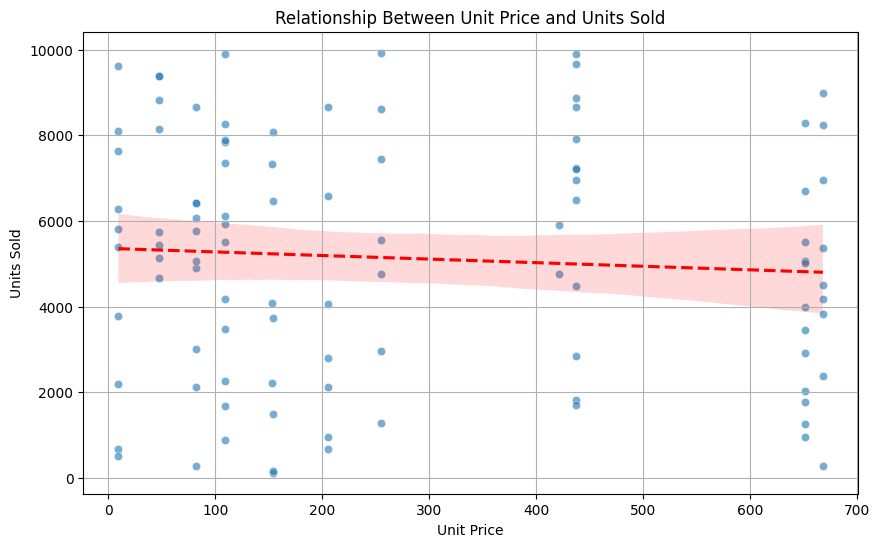

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Unit Price', y='Units Sold', data=df, scatter_kws={'alpha':0.6, 'edgecolors':'w', 'linewidth':0.5}, line_kws={'color':'r', 'linestyle':'--'})

plt.title('Relationship Between Unit Price and Units Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

**9...............Distribution of order values**

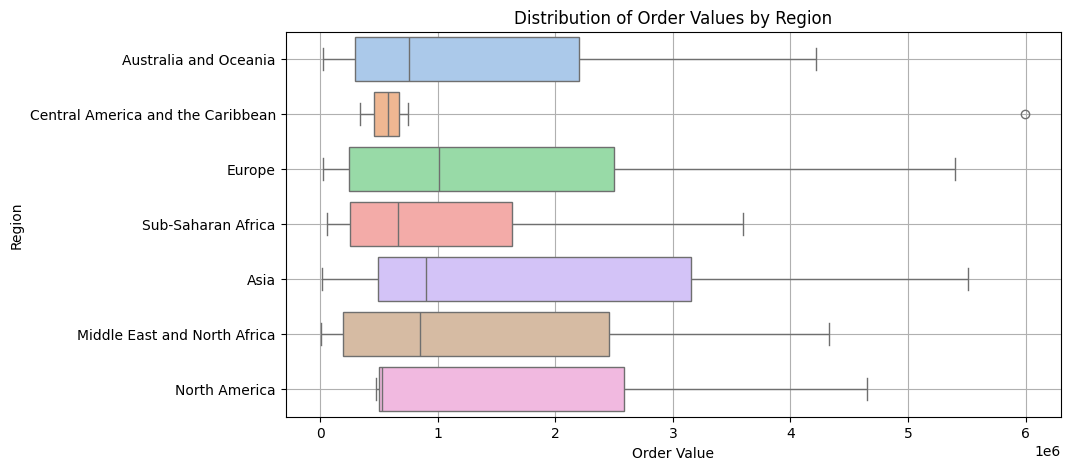

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='Region', x='Total Revenue', data=df, palette='pastel')
plt.title('Distribution of Order Values by Region')
plt.ylabel('Region')
plt.xlabel('Order Value')
plt.grid(True)
#plt.xticks(rotation=20, ha = 'right')
plt.show()

**10...........Which product have the highest profit margin**

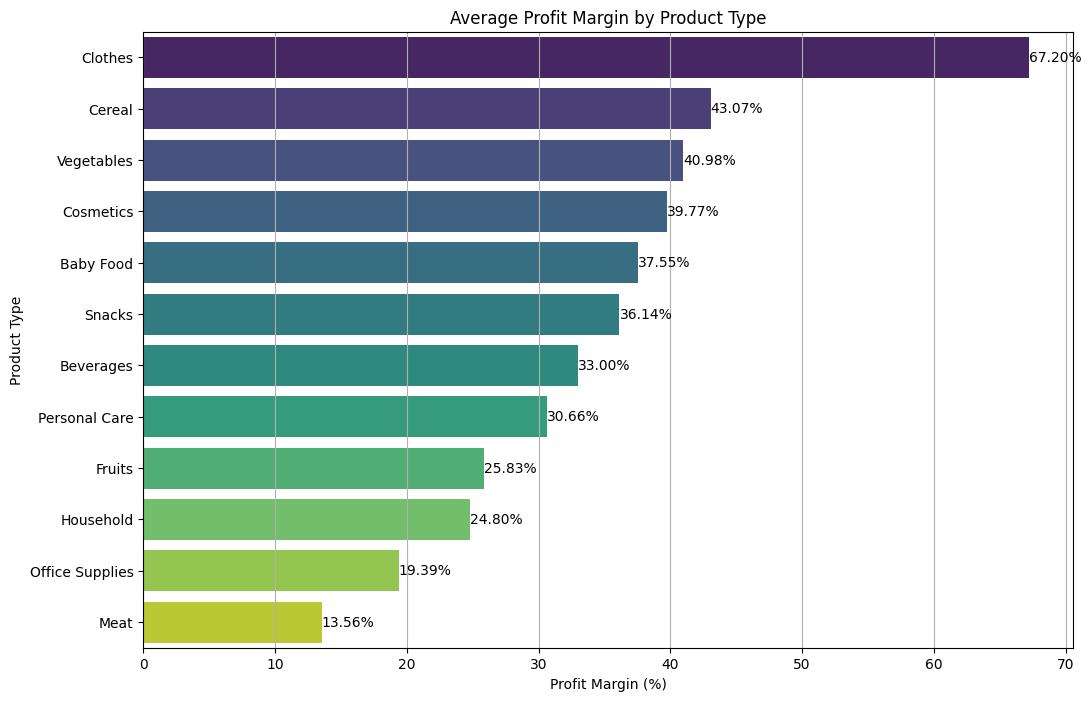

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate profit margin
df['profit_margin'] = (df['Total Profit'] / df['Total Revenue']) * 100

# Group by item type and calculate mean profit margin
product_profit_margin = df.groupby('Item Type')['profit_margin'].mean().reset_index()

# Sort by profit margin for better visualization
product_profit_margin = product_profit_margin.sort_values(by='profit_margin', ascending=False)

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='profit_margin', y='Item Type', data=product_profit_margin, palette='viridis')
plt.title('Average Profit Margin by Product Type')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Product Type')
plt.grid(True, axis='x')
for index, value in enumerate(product_profit_margin['profit_margin']):
    plt.text(value, index, f'{value:.2f}%', color='black', va="center")

plt.show()


**11........................How does Seasonality impact sales**

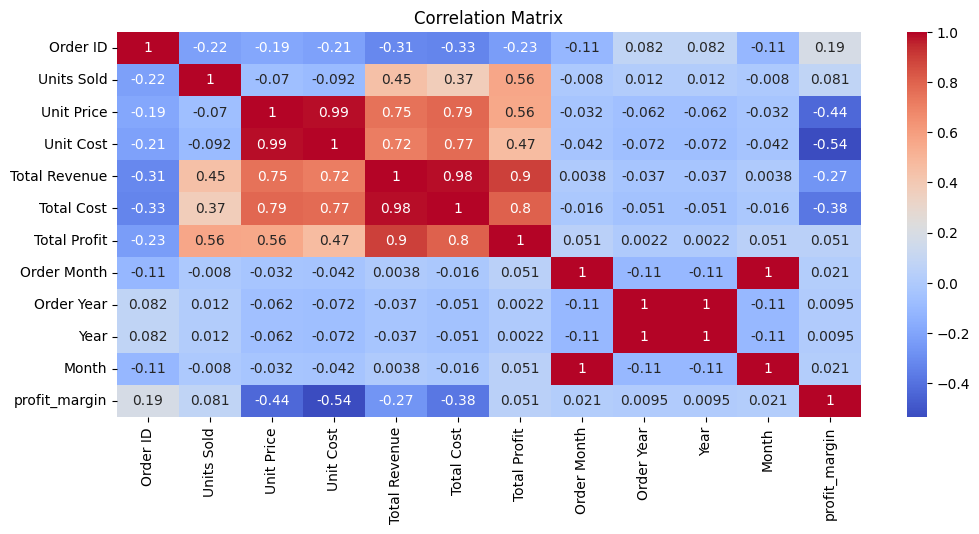

{'Total Sales': 137348768.31, 'Total Profit': 44168198.39999999, 'Average Order Value': 1373487.6831}


In [35]:
# Correlation matrix
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Key metrics
key_metrics = {
    'Total Sales': df['Total Revenue'].sum(),
    'Total Profit': df['Total Profit'].sum(),
    'Average Order Value': df['Total Revenue'].mean()
}

print(key_metrics)
